In [1]:
%matplotlib inline
from event import Event, iet
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
import pandas as pd

def do(id=id):
    # e = Event(id=id)
    e = Event(id=id, velocity_model=1750)
    depth = e.depth
    aic_t = e.aic_t
    arrival_times = [dates.num2date(t) for t in e.aic_t]
    
    sorted_aic = np.argsort(aic_t[2:])
    first_hydrophone = sorted_aic[0] + 2
    # first_hydrophone = sorted_aic[0] 
    second_hydrophone = sorted_aic[1] + 2
    # second_hydrophone = sorted_aic[1]
    
    event = {
        'depth':depth
        ,'aic_t':e.aic_t
        ,'arrival_times':arrival_times
        ,'sorted_aic':sorted_aic
        ,'first_hydrophone':first_hydrophone
        ,'second_hydrophone':second_hydrophone
    }
    # row = pd.DataFrame({'depth':(depth,)
    #                     , 'h1_arrival':arrival_times[0]
    #                     , 'h2_arrival':arrival_times[1]
    #                     , 'h3_arrival':arrival_times[2]
    #                     , 'h4_arrival':arrival_times[3]
    #                     , 'h5_arrival':arrival_times[4]
    #                     , 'h6_arrival':arrival_times[5]
    #                     # , 'aic_t':aic_t
    #                    }, index=(id,))
    return event

number of events detected: (1975, 7)


In [2]:
Event(id=75).aic_t

[18037.31946084491,
 18037.319457534722,
 18037.31945721065,
 18037.31945766204,
 18037.319456724537,
 18037.319457187503]

In [3]:
do(id=250)

{'depth': 186.625,
 'aic_t': [18037.322547881944,
  18037.32254784722,
  18037.32254943287,
  18037.322549675926,
  18037.322550162036,
  18037.32255077546],
 'arrival_times': [datetime.datetime(2019, 5, 21, 7, 44, 28, 137000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 44, 28, 134000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 44, 28, 271000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 44, 28, 292000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 44, 28, 334000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 44, 28, 387000, tzinfo=datetime.timezone.utc)],
 'sorted_aic': array([0, 1, 2, 3]),
 'first_hydrophone': 2,
 'second_hydrophone': 3}

In [4]:
# from multiprocessing import Pool
from multiprocess import Pool

# pool = Pool(9)
pool = Pool(10)

rows = pool.map(do, iet.df.index.values)

pool.close()

In [5]:
rows[0]

{'depth': -73.25,
 'aic_t': [18037.31817253472,
  18037.3181718287,
  18037.31817347222,
  18037.318177152778,
  18037.318177152778,
  18037.318177152778],
 'arrival_times': [datetime.datetime(2019, 5, 21, 7, 38, 10, 107000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 38, 10, 46000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 38, 10, 188000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 38, 10, 506000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 38, 10, 506000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2019, 5, 21, 7, 38, 10, 506000, tzinfo=datetime.timezone.utc)],
 'sorted_aic': array([0, 1, 2, 3]),
 'first_hydrophone': 2,
 'second_hydrophone': 3}

(400.0, 150.0)

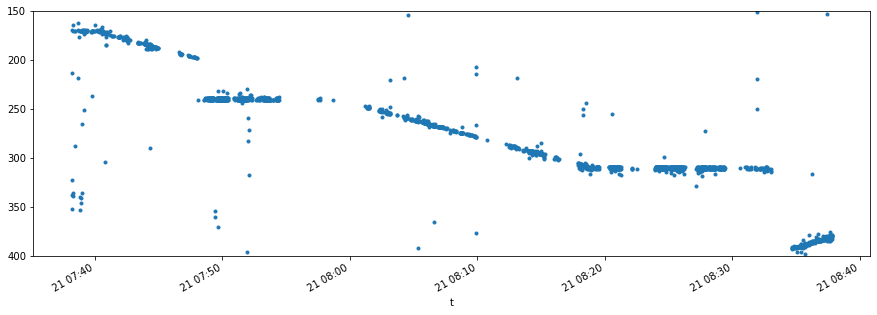

In [6]:
classdepth = pd.DataFrame(rows)
classdepth['t'] = classdepth.apply(lambda x:x['arrival_times'][x['sorted_aic'][0]+2], axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
classdepth.set_index('t').depth.plot(marker='.', linewidth=0, ax=ax)
ax.set_ylim(400, 150)

In [7]:
depths = []
tas = []
tbs = []
dts = []
rel_depths = []
true_depths = []
signs = []
which_phone = []

vp = 1750
h_depths = [30, 100, 170, 240, 310, 380]

for r in rows:
    ta = r['arrival_times'][r['first_hydrophone']]
    tb = r['arrival_times'][r['second_hydrophone']]
    dt = (ta - tb).total_seconds()
    sign = r['first_hydrophone'] - r['second_hydrophone']
    dz_phone = np.min([r['first_hydrophone'], r['second_hydrophone']])
    # hydrophone_depth = h_depths[r['first_hydrophone']]
    hydrophone_depth = h_depths[dz_phone]

    dz = 35 - 0.5 * dt * vp * sign
    z = dz + hydrophone_depth
    
    
    tas.append(ta)
    tbs.append(tb)
    dts.append(dt)
    rel_depths.append(dz)
    true_depths.append(z)
    signs.append(sign)
    which_phone.append(dz_phone)

(array([ 7.,  4.,  1.,  1.,  1.,  0.,  3.,  0.,  7., 12., 18., 35., 37.,
        25., 14., 22., 12., 22., 23., 22., 23., 21., 15.,  6., 10., 22.,
        14., 11., 19., 11., 15., 13., 23., 30., 27., 16.,  5., 11.,  7.,
         7., 18., 22., 13., 14.,  9., 17., 20., 39., 40., 64., 37., 32.,
        50., 26., 13., 10., 21., 16., 33., 32., 36., 33., 29., 16., 27.,
        25., 22., 20., 10.,  9., 11.,  9., 20., 25.,  5., 18.,  5.,  7.,
        10., 31., 22., 18., 15.,  2.,  1., 10., 15., 13., 20., 15.,  1.,
         3.,  1.,  2.,  0.,  0.,  0.,  1.,  2.]),
 array([-0.05      , -0.0489899 , -0.0479798 , -0.0469697 , -0.0459596 ,
        -0.04494949, -0.04393939, -0.04292929, -0.04191919, -0.04090909,
        -0.03989899, -0.03888889, -0.03787879, -0.03686869, -0.03585859,
        -0.03484848, -0.03383838, -0.03282828, -0.03181818, -0.03080808,
        -0.02979798, -0.02878788, -0.02777778, -0.02676768, -0.02575758,
        -0.02474747, -0.02373737, -0.02272727, -0.02171717, -0.02070707,
 

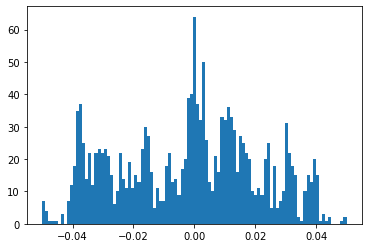

In [8]:
plt.hist(np.array(dts)*np.array(signs), bins=np.linspace(-0.05, 0.05, 100))

(400.0, 150.0)

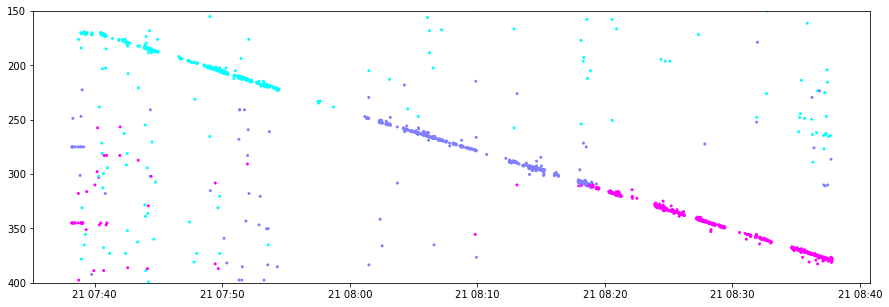

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

cbar = ax.scatter(tas, true_depths, marker='.', linewidth=0,  c=which_phone, cmap='cool')
# fig.colorbar(cbar, title='sign'
ax.set_ylim(400, 150)

In [10]:
e = Event(id=750)

(<Figure size 1080x2160 with 12 Axes>,
 array([<AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>], dtype=object))

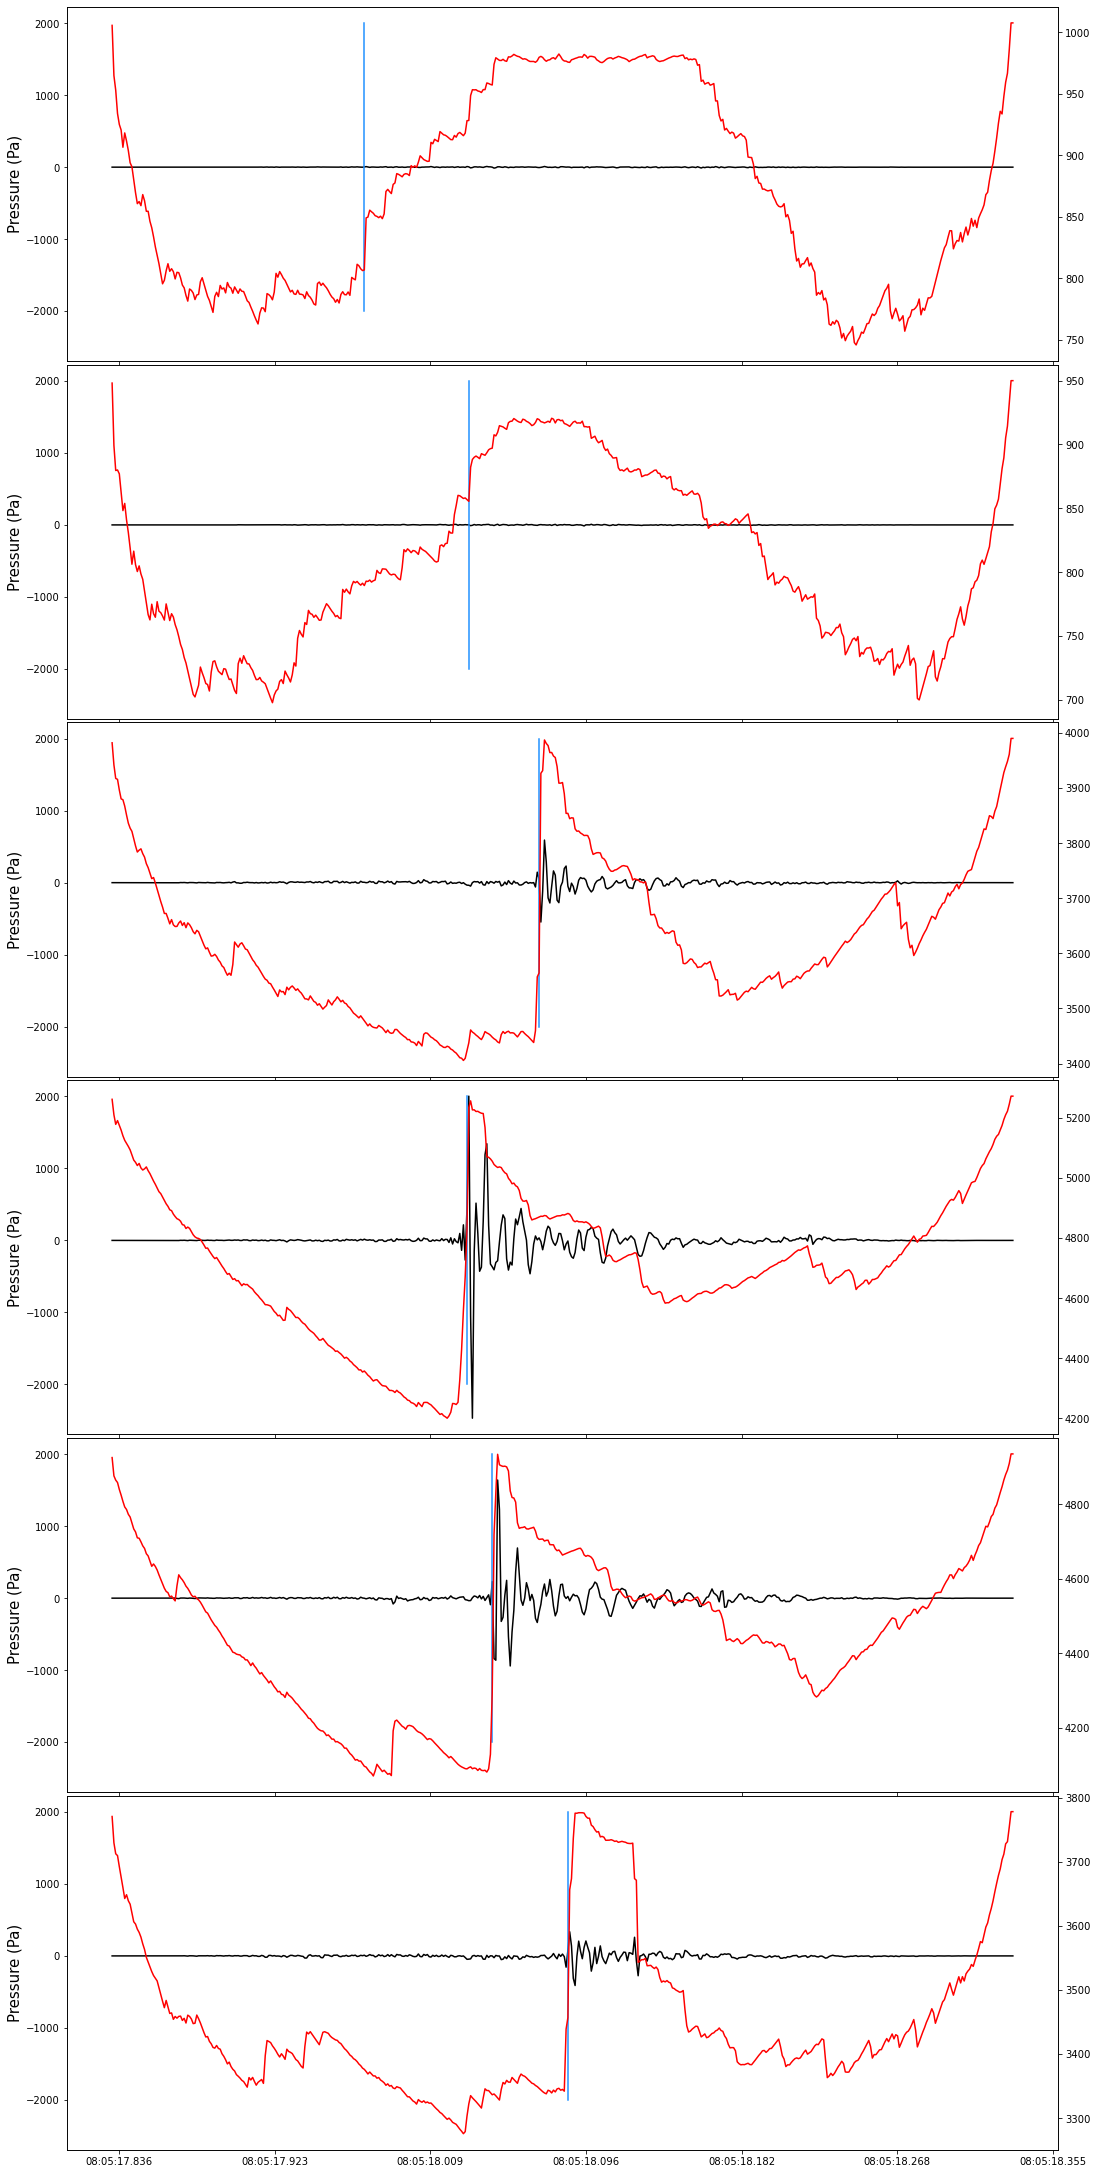

In [11]:
e.plot('waveforms')

In [12]:
iet.df.shape

(1975, 7)

(array([ 73., 120.,   0., 834.,   0.,   0., 770.,   0.,  59., 119.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

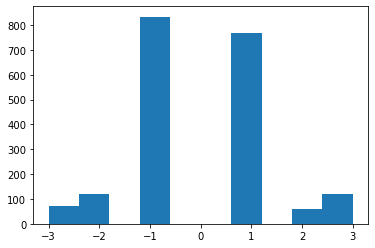

In [13]:
plt.hist(np.array(signs))